<a href="https://colab.research.google.com/github/arden333/test/blob/main/Subscription_churn_prediction_%EC%B5%9C%EC%A2%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 데이터 분석

In [1]:
# 라이브러리
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

import warnings
warnings.filterwarnings('ignore')

In [2]:
# 그래프 설정
# 한글폰트 설정
# plt.rcParams['font.family'] = 'NanumBarunGothic'
# sns.set(font='NanumBarunGothic')

# 그래프 설정
sns.set_style('white')

# 팔레트 설정
oryel = ['#E0B03C','#F1BA75','#F69960','#F97857','#F25958']
sns.set_palette(sns.color_palette(oryel))

In [3]:
df_case = pd.read_csv('customer_cases.csv', index_col=0)
df_cst = pd.read_csv('customer_info.csv', index_col=0)
df_prdt = pd.read_csv('customer_product.csv', index_col=0)
df_prdt_info = pd.read_csv('product_info.csv', index_col=0)
print('case data:', df_case.shape)
print('customer data:', df_cst.shape)
print('customer-product data:', df_prdt.shape)
print('product data:', df_prdt_info.shape)

case data: (330512, 5)
customer data: (508932, 3)
customer-product data: (508932, 4)
product data: (2, 3)


In [4]:
df_case.head()

,case_id,date_time,customer_id,channel,reason
1,CC101,2017-01-01 10:32:03,C2448,phone,signup
2,CC102,2017-01-01 11:35:47,C2449,phone,signup
3,CC103,2017-01-01 11:37:09,C2450,phone,signup
4,CC104,2017-01-01 13:28:14,C2451,phone,signup
5,CC105,2017-01-01 13:52:22,C2452,phone,signup


In [5]:
num =df_case['customer_id'].value_counts().sort_index()
num

C10000     2
C100000    2
C100001    1
C100002    1
C100003    1
          ..
C99995     2
C99996     2
C99997     3
C99998     1
C99999     2
Name: customer_id, Length: 258660, dtype: int64

In [6]:
num_case = pd.DataFrame(data=num).reset_index()
num_case.columns = ['customer_id', 'num_case']
num_case

,customer_id,num_case
0,C10000,2
1,C100000,2
2,C100001,1
3,C100002,1
4,C100003,1
...,...,...
258655,C99995,2
258656,C99996,2
258657,C99997,3
258658,C99998,1


In [7]:
df_case[df_case['customer_id']=='C20510']

,case_id,date_time,customer_id,channel,reason
29705,CC29805,2018-05-05 13:56:59,C20510,phone,signup
46878,CC46978,2018-10-25 12:12:10,C20510,phone,support
47138,CC47238,2018-10-28 17:25:06,C20510,phone,support
57329,CC57429,2019-02-05 11:42:35,C20510,email,support
90191,CC90291,2019-08-10 09:39:37,C20510,phone,support


In [8]:
df_case = pd.merge(df_case, num_case, on='customer_id', how='left')
print(df_case.shape)
df_case.head()

(330512, 6)


,case_id,date_time,customer_id,channel,reason,num_case
0,CC101,2017-01-01 10:32:03,C2448,phone,signup,1
1,CC102,2017-01-01 11:35:47,C2449,phone,signup,1
2,CC103,2017-01-01 11:37:09,C2450,phone,signup,1
3,CC104,2017-01-01 13:28:14,C2451,phone,signup,2
4,CC105,2017-01-01 13:52:22,C2452,phone,signup,1


In [9]:
df_cst.head()

,customer_id,age,gender
1,C2448,76,female
2,C2449,61,male
3,C2450,58,female
4,C2451,62,female
5,C2452,71,male


In [10]:
df_prdt.head()

,customer_id,product,signup_date_time,cancel_date_time
1,C2448,prd_1,2017-01-01 10:35:09,NaN
2,C2449,prd_1,2017-01-01 11:39:29,2021-09-05 10:00:02
3,C2450,prd_1,2017-01-01 11:42:00,2019-01-13 16:24:55
4,C2451,prd_2,2017-01-01 13:32:08,NaN
5,C2452,prd_1,2017-01-01 13:57:30,2021-06-28 18:06:01


In [11]:
df_prdt_info.head()

,name,price,billing_cycle
product_id,,,
prd_1,annual_subscription,1200,12
prd_2,monthly_subscription,125,1


In [12]:
df_case[df_case['customer_id']=='C2477']

,case_id,date_time,customer_id,channel,reason,num_case
29,CC130,2017-01-02 11:45:47,C2477,phone,signup,2
110,CC211,2017-01-03 14:30:38,C2477,phone,support,2


customer_id가 중복인 경우는 구독신청 후 서비스 이용 관련하여 연락이 온 경우임

In [13]:
# 중복값들만 추출
cst_dup = df_case[df_case['customer_id'].duplicated()]
# customer_id가 중복된 경우는 모두 support
# 즉, 기존 이용객의 이용 관련 전화
(cst_dup['reason']=='signup').sum()

0

In [14]:
# customer_id 중복된 고객 이용행태
a = cst_dup.groupby('customer_id').count()
print('고객당 support 최대 이용건수', a['case_id'].max())
print('고객당 support 평균 이용건수', a['case_id'].mean())

고객당 support 최대 이용건수 4
고객당 support 평균 이용건수 1.119137734996807


In [15]:
# suppot 행 제거
df_sign = df_case.drop(cst_dup.index)
df_sign.shape

(258660, 6)

### 데이터셋 합치기

In [16]:
# 합칠 데이터셋에 중복값 있는지 확인
print(df_cst.duplicated().sum())
print(df_prdt.duplicated().sum())

0
0


In [17]:
# 데이터셋 합치기
df = pd.merge(df_sign, df_cst, how='left', on='customer_id')
df = pd.merge(df, df_prdt, how='left', on='customer_id')
print(df.shape)
df.head()

(258660, 11)


,case_id,date_time,customer_id,channel,reason,num_case,age,gender,product,signup_date_time,cancel_date_time
0,CC101,2017-01-01 10:32:03,C2448,phone,signup,1,76,female,prd_1,2017-01-01 10:35:09,NaN
1,CC102,2017-01-01 11:35:47,C2449,phone,signup,1,61,male,prd_1,2017-01-01 11:39:29,2021-09-05 10:00:02
2,CC103,2017-01-01 11:37:09,C2450,phone,signup,1,58,female,prd_1,2017-01-01 11:42:00,2019-01-13 16:24:55
3,CC104,2017-01-01 13:28:14,C2451,phone,signup,2,62,female,prd_2,2017-01-01 13:32:08,NaN
4,CC105,2017-01-01 13:52:22,C2452,phone,signup,1,71,male,prd_1,2017-01-01 13:57:30,2021-06-28 18:06:01


### EDA / Feature Engineering

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 258660 entries, 0 to 258659
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   case_id           258660 non-null  object
 1   date_time         258660 non-null  object
 2   customer_id       258660 non-null  object
 3   channel           258660 non-null  object
 4   reason            258660 non-null  object
 5   num_case          258660 non-null  int64 
 6   age               258660 non-null  int64 
 7   gender            258660 non-null  object
 8   product           258660 non-null  object
 9   signup_date_time  258660 non-null  object
 10  cancel_date_time  59578 non-null   object
dtypes: int64(2), object(9)
memory usage: 23.7+ MB


In [19]:
df.isnull().sum()

case_id                  0
date_time                0
customer_id              0
channel                  0
reason                   0
num_case                 0
age                      0
gender                   0
product                  0
signup_date_time         0
cancel_date_time    199082
dtype: int64

cancel_date_time 외에는 결측치 없음. 구독취소를 하지 않은 경우 cancel_date_time이 결측치로 나타남.
즉 cancel_date_time의 결측치는 현재 구독중인 이용자를 의미

컬럼 정리
1. case_id, customer_id   
   - 모델 학습 시 제거할 것, 수치만 남겨서 int 형변환
2. date_time : case 일자이므로 제거
3. reason : signup case만 추출했으므로 제거
4. product : prd_1은 'annual', prd_2는 'monthly'로 변경
5. signup/cancel_date_time
   - date까지만 사용   
   - cancel_date_time : 결측치 0으로 채우기
   - cancel-signup해서 구독기간 특성 만들 것   
6. age : 연령대 추가

In [20]:
# feature engineering

# customer_id int형변환
df['id'] = df['customer_id'].str.extract('(\d+)')
df['id'].astype(int)

# prouct명으로 변경
df['product'] = df['product'].replace({'prd_1':'annual', 'prd_2':'monthly'})

# age : min=22, max=78
# 20대~70대로 구분
def age_group(age):
    age = (age//10)*10 #10으로 나눈 몫*10
    return age

age_gr = df.age.apply(age_group)
age_gr = age_gr.astype('category')

df.insert(2, 'age_gr', age_gr)

# 불필요한 특성 제거
dels = ['case_id', 'date_time', 'reason', 'customer_id']
df.drop(columns=dels, inplace=True)

# 컬럼 순서 변경
df = df[['id','age','age_gr','gender','product','channel','num_case','signup_date_time', 'cancel_date_time']]

df.head()

,id,age,age_gr,gender,product,channel,num_case,signup_date_time,cancel_date_time
0,2448,76,70,female,annual,phone,1,2017-01-01 10:35:09,NaN
1,2449,61,60,male,annual,phone,1,2017-01-01 11:39:29,2021-09-05 10:00:02
2,2450,58,50,female,annual,phone,1,2017-01-01 11:42:00,2019-01-13 16:24:55
3,2451,62,60,female,monthly,phone,2,2017-01-01 13:32:08,NaN
4,2452,71,70,male,annual,phone,1,2017-01-01 13:57:30,2021-06-28 18:06:01


In [21]:
# 구독 취소 고객 여부
# 결측치를 0으로 채운 후 구독여부 구분
df['cancel_date_time']=df['cancel_date_time'].fillna(0)

lst = []
for i in df.index:
    if df.loc[i, 'cancel_date_time'] == 0:
        lst.append(0) # 취소 안한 사람(구독 유지)
    else:
        lst.append(1) # 취소한 사람(취소 = 1)
df['cancel'] = lst
df.head()

,id,age,age_gr,gender,product,channel,num_case,signup_date_time,cancel_date_time,cancel
0,2448,76,70,female,annual,phone,1,2017-01-01 10:35:09,0,0
1,2449,61,60,male,annual,phone,1,2017-01-01 11:39:29,2021-09-05 10:00:02,1
2,2450,58,50,female,annual,phone,1,2017-01-01 11:42:00,2019-01-13 16:24:55,1
3,2451,62,60,female,monthly,phone,2,2017-01-01 13:32:08,0,0
4,2452,71,70,male,annual,phone,1,2017-01-01 13:57:30,2021-06-28 18:06:01,1


In [22]:
# 구독기간 계산 위한 컬럼 생성
df['max_date'] = df['cancel_date_time']
df['max_date']=df['max_date'].replace(0,'2021-12-31')

# date와 time  분리
df['s_date'],df['s_time'] = df['signup_date_time'].str.split(' ',1).str
df['c_date'],df['c_time'] = df['max_date'].str.split(' ',1).str
df.drop(columns=['s_time','c_time'], axis=1, inplace=True)

# 날짜 계산 위해 datetime 형변환
df['s_date'] = pd.to_datetime(df['s_date'], format='%Y-%m-%d')
df['c_date'] = pd.to_datetime(df['c_date'], format='%Y-%m-%d')

# 구독기간 계산
df['period'] = df['c_date'] - df['s_date']
df['period_m'] = round(df['period'].dt.days / 30.4,1) # timedelta를 int로 변환(일 단위) 후 개월 수 환산
df.drop('period',axis=1, inplace=True)

# 연도 분리
df['s_year'] = df['s_date'].dt.year.astype(int)
df['c_year'] = df['c_date'].dt.year.astype(int)
df.head()

,id,age,age_gr,gender,product,channel,num_case,signup_date_time,cancel_date_time,cancel,max_date,s_date,c_date,period_m,s_year,c_year
0,2448,76,70,female,annual,phone,1,2017-01-01 10:35:09,0,0,2021-12-31,2017-01-01,2021-12-31,60.0,2017,2021
1,2449,61,60,male,annual,phone,1,2017-01-01 11:39:29,2021-09-05 10:00:02,1,2021-09-05 10:00:02,2017-01-01,2021-09-05,56.2,2017,2021
2,2450,58,50,female,annual,phone,1,2017-01-01 11:42:00,2019-01-13 16:24:55,1,2019-01-13 16:24:55,2017-01-01,2019-01-13,24.4,2017,2019
3,2451,62,60,female,monthly,phone,2,2017-01-01 13:32:08,0,0,2021-12-31,2017-01-01,2021-12-31,60.0,2017,2021
4,2452,71,70,male,annual,phone,1,2017-01-01 13:57:30,2021-06-28 18:06:01,1,2021-06-28 18:06:01,2017-01-01,2021-06-28,53.9,2017,2021


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 258660 entries, 0 to 258659
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id                258660 non-null  object        
 1   age               258660 non-null  int64         
 2   age_gr            258660 non-null  category      
 3   gender            258660 non-null  object        
 4   product           258660 non-null  object        
 5   channel           258660 non-null  object        
 6   num_case          258660 non-null  int64         
 7   signup_date_time  258660 non-null  object        
 8   cancel_date_time  258660 non-null  object        
 9   cancel            258660 non-null  int64         
 10  max_date          258660 non-null  object        
 11  s_date            258660 non-null  datetime64[ns]
 12  c_date            258660 non-null  datetime64[ns]
 13  period_m          258660 non-null  float64       
 14  s_ye

In [24]:
df.shape

(258660, 16)

연도별, 구독형태별 이용자 수

In [25]:
pl_signup = df.groupby(['s_year','product'], as_index=False)['id'].count()
pl_signup.columns = ['year','product','signup']
pl_signup

,year,product,signup
0,2017,annual,14487
1,2017,monthly,3552
2,2018,annual,23371
3,2018,monthly,7492
4,2019,annual,39365
5,2019,monthly,15231
6,2020,annual,37085
7,2020,monthly,29555
8,2021,annual,25039
9,2021,monthly,63483


In [26]:
# 구독취소한 사람 데이터
df_ccl = df[df['cancel']==1]
print(df_ccl.shape)
df_ccl.head()

(59578, 16)


,id,age,age_gr,gender,product,channel,num_case,signup_date_time,cancel_date_time,cancel,max_date,s_date,c_date,period_m,s_year,c_year
1,2449,61,60,male,annual,phone,1,2017-01-01 11:39:29,2021-09-05 10:00:02,1,2021-09-05 10:00:02,2017-01-01,2021-09-05,56.2,2017,2021
2,2450,58,50,female,annual,phone,1,2017-01-01 11:42:00,2019-01-13 16:24:55,1,2019-01-13 16:24:55,2017-01-01,2019-01-13,24.4,2017,2019
4,2452,71,70,male,annual,phone,1,2017-01-01 13:57:30,2021-06-28 18:06:01,1,2021-06-28 18:06:01,2017-01-01,2021-06-28,53.9,2017,2021
6,2454,53,50,male,annual,phone,2,2017-01-01 15:35:03,2021-06-01 17:09:40,1,2021-06-01 17:09:40,2017-01-01,2021-06-01,53.0,2017,2021
8,2456,70,70,female,annual,phone,1,2017-01-02 09:21:04,2017-06-08 15:57:45,1,2017-06-08 15:57:45,2017-01-02,2017-06-08,5.2,2017,2017


In [27]:
# 구독취소한 사람들의 구독형태별 평균 수치
df_ccl.groupby(['product'])['age','num_case','period_m'].mean()

,age,num_case,period_m
product,,,
annual,57.912060,1.233411,17.546402
monthly,57.944855,1.351752,12.313509


In [28]:
pl_cancel = df_ccl.groupby(['c_year','product'], as_index=False)['id'].count()
pl_cancel.columns = ['year','product','cancel']

# 연도별, 상품별 이용자수 취합
pl = pd.merge(pl_signup, pl_cancel)
pl


,year,product,signup,cancel
0,2017,annual,14487,797
1,2017,monthly,3552,261
2,2018,annual,23371,2607
3,2018,monthly,7492,1032
4,2019,annual,39365,5519
5,2019,monthly,15231,2823
6,2020,annual,37085,9909
7,2020,monthly,29555,6572
8,2021,annual,25039,13690
9,2021,monthly,63483,16368


In [29]:
# 평균 구독 개월 수 추가(구독신청한 일자로부터의 구독개월 수)
pl_period = df.groupby(['s_year','product'], as_index=False)['period_m'].mean().round(2)
pl_period.columns = ['year','product','period']

pl=pd.merge(pl, pl_period)
pl

,year,product,signup,cancel,period
0,2017,annual,14487,797,44.07
1,2017,monthly,3552,261,40.22
2,2018,annual,23371,2607,35.94
3,2018,monthly,7492,1032,32.66
4,2019,annual,39365,5519,26.70
5,2019,monthly,15231,2823,24.40
6,2020,annual,37085,9909,17.10
7,2020,monthly,29555,6572,16.29
8,2021,annual,25039,13690,7.06
9,2021,monthly,63483,16368,7.05


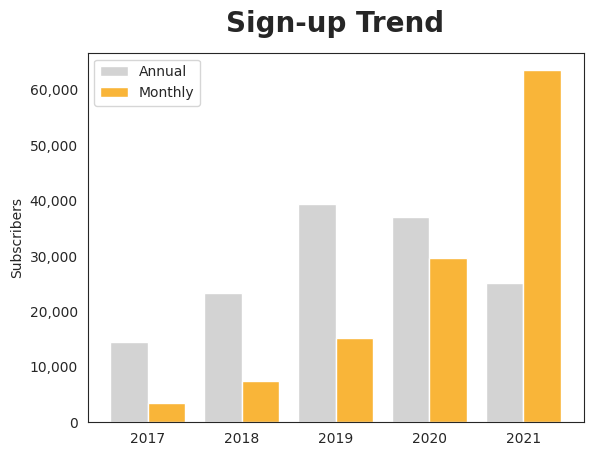

In [82]:
labels = ['2017','2018','2019','2020','2021']
value_a = pl[pl['product']=='annual']['signup']
value_b = pl[pl['product']=='monthly']['signup']

# 묶은 막대 그래프
def create_x(t, w, n, d):
    return [t*x + w*n for x in range(d)]
# n : This is our first dataset (out of 2)
# t : Number of dataset
# d : Number of sets of bars
# w : Width of each bar
value_a_x = create_x(2, 0.8, 1, 5)
value_b_x = create_x(2, 0.8, 2, 5)

# plt.rcParams['font.family'] = 'NanumBarunGothic'
ax = plt.subplot()
ax.bar(value_a_x, value_a, color='lightgrey', label='Annual')
ax.bar(value_b_x, value_b, color='#F9B539', label='Monthly')
middle_x = [(a+b)/2 for (a,b) in zip(value_a_x, value_b_x)]
ax.set_xticks(middle_x)
ax.set_xticklabels(labels)

plt.title('Sign-up Trend', size=20, weight='bold', pad=15)
plt.ylabel('Subscribers')
plt.legend()
# y축 천단위 , 표시
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values]);
plt.show()

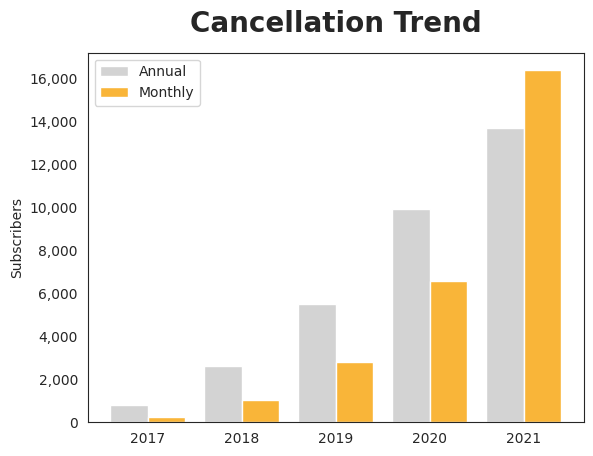

In [80]:
labels = ['2017','2018','2019','2020','2021']
value_a = pl[pl['product']=='annual']['cancel']
value_b = pl[pl['product']=='monthly']['cancel']

# 묶은 막대 그래프
def create_x(t, w, n, d):
    return [t*x + w*n for x in range(d)]
# n : This is our first dataset (out of 2)
# t : Number of dataset
# d : Number of sets of bars
# w : Width of each bar
value_a_x = create_x(2, 0.8, 1, 5)
value_b_x = create_x(2, 0.8, 2, 5)

# plt.rcParams['font.family'] = 'NanumBarunGothic'
ax = plt.subplot()
ax.bar(value_a_x, value_a, color='lightgrey', label='Annual')
ax.bar(value_b_x, value_b, color='#F9B539', label='Monthly')
middle_x = [(a+b)/2 for (a,b) in zip(value_a_x, value_b_x)]
ax.set_xticks(middle_x)
ax.set_xticklabels(labels)

plt.title('Cancellation Trend', size=20, weight='bold', pad=15)
plt.ylabel('Subscribers')
plt.legend()
# y축 천단위 , 표시
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values]);
plt.show()

- 2020년부터 월간 구독신청이 급증, 연간 구독의 취소가 더 많음  
- 그러나 이용자 수만으로 판단하기 애매. 유형별 취소율 살펴보자
- 연간 구독은 월간 구독보다 가격이 80% 저렴. 매출비중으로 볼 때 자사에 더 중요한 구독형태는 무엇?

In [32]:
# 연간 구독 이용자

from cgi import print_exception


pl_ann = pl[pl['product']=='annual'].reset_index(drop=True)

# 연도별 잔존 이용자
pl_ann['actual'] = pl_ann.signup - pl_ann.cancel
# 연도별 누적 이용객 수(이탈률 구할 때 사용)
lst = [13690]
for i in range(1,5):
    val = lst[i-1] + pl_ann.loc[i,'signup'] - pl_ann.loc[i,'cancel']
    lst.append(val)
pl_ann['cumul'] =lst

# 고객이탈률
# 당월 고객 이탈수 / 월초 고객 수 (당월 신규는 제외)
pl_ann['churn_rate'] = round(pl_ann['cancel'] / pl_ann['cumul'],3) # actual -> cumul로 수식 수정

# lifetime = 1 / churn rate
pl_ann['lifetime'] = round(1 / pl_ann['churn_rate'],3)

# LTV(life time value) = 이용금액 * lifetime
pl_ann['ann_ltv'] = pl_ann['lifetime']*120

pl_ann.head()

,year,product,signup,cancel,period,actual,cumul,churn_rate,lifetime,ann_ltv
0,2017,annual,14487,797,44.07,13690,13690,0.058,17.241,2068.92
1,2018,annual,23371,2607,35.94,20764,34454,0.076,13.158,1578.96
2,2019,annual,39365,5519,26.70,33846,68300,0.081,12.346,1481.52
3,2020,annual,37085,9909,17.10,27176,95476,0.104,9.615,1153.80
4,2021,annual,25039,13690,7.06,11349,106825,0.128,7.812,937.44


Life Time ≒ 1 ÷ Customer Churn Rate
예를 들어 고객 100명의 고객이 월 평균 10%씩 이탈한다면 51개월 후 0에 수렴하게 되며 평균 고객 사용 기간은 9.5일이 됩니다. 이는 1 ÷ 0.1의 값인 10과 비슷한 수치라고 할 수 있습니다.
100명의 고객이 월 평균 3%씩 이탈한다면 평균 33개월의 평균 고객 수명을 계산할 수 있습니다.

평균 고객 수명 가치(LTV, Life Time Value)는 고객 한명이 수명 기간 동안 사용하는 비용을 구하는 것입니다. 수식은 아래와 같습니다.
LTV = 사용자당 평균 MRR X Life Time = 사용자당 평균 MRR / Customer Churn Rate
예를 들어 사용자가 한달 평균 1만원을 사용하고 평균 수명주기가 6개월이라면 해당 서비스의 평균 고객 수명 가치(LTV)는 6만원이 됩니다. 이는 사용자당 평균 MRR의 편차가 크지 않은 서비스에서는 충분히 사용 가능한 방법입니다.


In [33]:
# 월간 구독 이용자
pl_mon = pl[pl['product']=='monthly'].reset_index(drop=True)

# 연도발 잔존 이용자
pl_mon['actual'] = pl_mon.signup - pl_mon.cancel
# 연도별 누적이용객 수
lst = [3291]
for i in range(1,5):
    val = lst[i-1] + pl_mon.loc[i,'signup'] - pl_mon.loc[i,'cancel']
    lst.append(val)
pl_mon['cumul'] =lst

# 고객이탈률
# 당월 고객 이탈수 / 월초 고객 수 (당월 신규는 제외)
pl_mon['churn_rate'] = round(pl_mon['cancel'] / pl_mon['cumul'],3) # actual -> cumul로 수식 수정

# lifetime = 1 / churn rate
pl_mon['lifetime'] = round(1 / pl_mon['churn_rate'],3)

# LTV(life time value) = 이용금액 * lifetime
pl_mon['mon_ltv'] = pl_mon['lifetime']*125

pl_mon.head()

,year,product,signup,cancel,period,actual,cumul,churn_rate,lifetime,mon_ltv
0,2017,monthly,3552,261,40.22,3291,3291,0.079,12.658,1582.250
1,2018,monthly,7492,1032,32.66,6460,9751,0.106,9.434,1179.250
2,2019,monthly,15231,2823,24.40,12408,22159,0.127,7.874,984.250
3,2020,monthly,29555,6572,16.29,22983,45142,0.146,6.849,856.125
4,2021,monthly,63483,16368,7.05,47115,92257,0.177,5.650,706.250


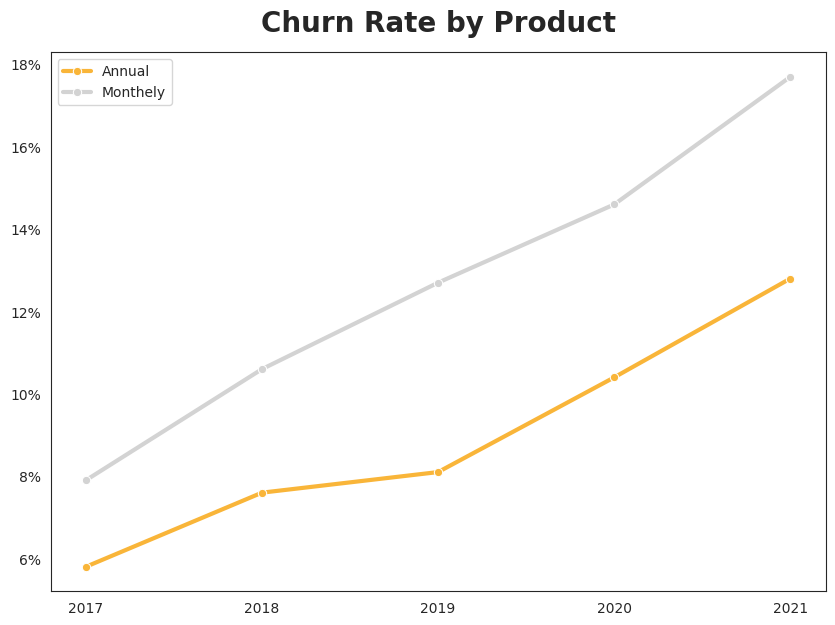

In [85]:
churn_rate = pd.DataFrame({'year' : [2017,2018,2019,2020,2021],
                        'annual':pl_ann['churn_rate'],
                        'monthly':pl_mon['churn_rate']})

# plt.rcParams['font.family'] = 'NanumBarunGothic'
plt.figure(figsize=(10,7))
sns.lineplot(x='year', y='annual', marker='o',data=churn_rate, color='#F9B539', linewidth='3', label='Annual')
sns.lineplot(x='year', y='monthly', marker='o',data=churn_rate, color='lightgrey', linewidth='3', label='Monthely')
plt.title('Churn Rate by Product', size=20, weight='bold', pad=15)
plt.xticks(churn_rate['year'])
# plt.legend(['Annual', 'Monthly'])
plt.xlabel('')
plt.ylabel('')
# 축 라벨 백분율로 표기
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:.0%}'.format(x) for x in current_values])

plt.show()

연간구독보다 월간구독의 이탈률이 큼

In [35]:
ltv = pd.concat([pl_ann['year'], pl_ann['ann_ltv'], pl_mon['mon_ltv']], axis=1)
ltv

,year,ann_ltv,mon_ltv
0,2017,2068.92,1582.250
1,2018,1578.96,1179.250
2,2019,1481.52,984.250
3,2020,1153.80,856.125
4,2021,937.44,706.250


from matplotlib import pyplot as plt
ltv['year'].plot(kind='hist', bins=20, title='year')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
ltv['ann_ltv'].plot(kind='hist', bins=20, title='ann_ltv')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
ltv['mon_ltv'].plot(kind='hist', bins=20, title='mon_ltv')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
ltv.plot(kind='scatter', x='year', y='ann_ltv', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
ltv.plot(kind='scatter', x='ann_ltv', y='mon_ltv', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['year']
  ys = series['ann_ltv']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = ltv.sort_values('year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('year')
_ = plt.ylabel('ann_ltv')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['year']
  ys = series['mon_ltv']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = ltv.sort_values('year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('year')
_ = plt.ylabel('mon_ltv')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['year']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'year'}, axis=1)
              .sort_values('year', ascending=True))
  xs = counted['year']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = ltv.sort_values('year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('year')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
ltv['year'].plot(kind='line', figsize=(8, 4), title='year')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
ltv['ann_ltv'].plot(kind='line', figsize=(8, 4), title='ann_ltv')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
ltv['mon_ltv'].plot(kind='line', figsize=(8, 4), title='mon_ltv')
plt.gca().spines[['top', 'right']].set_visible(False)

In [36]:
# product 시각화
# fig = px.pie(values=sales['sales'],
#              names=['Anuual','Monthly'],
#              color_discrete_sequence=px.colors.sequential.Oryel)
# fig.update_traces(textposition='inside', textinfo='percent+label')
# fig.update_layout(showlegend=False)
# fig.show()

월간구독이 연간구독보다 판매가는 높지만 고객의 이탈률이 높음  
연간구독은 월간구독보다 평균 구독기간이 길어 비교적 장기적인 고객관계 형성 용이  
현재 구독 이용자 매출 비중에서도 연간구독이 더 큼  
따라서, 연간구독 이용자의 해지방어에 집중한다!

* * *

### 연간구독 해지 이용자 분석   
연간구독 해지 이용자의 특징을 분석하여 해지가 예상되는 고객을 분류하는 기준으로 설정하고자 함

In [37]:
ccl_ann = df_ccl[df_ccl['product']=='annual']
ccl_ann.drop(columns=['product','cancel'], inplace=True)
print(ccl_ann.shape)
ccl_ann.head()

(32522, 14)


,id,age,age_gr,gender,channel,num_case,signup_date_time,cancel_date_time,max_date,s_date,c_date,period_m,s_year,c_year
1,2449,61,60,male,phone,1,2017-01-01 11:39:29,2021-09-05 10:00:02,2021-09-05 10:00:02,2017-01-01,2021-09-05,56.2,2017,2021
2,2450,58,50,female,phone,1,2017-01-01 11:42:00,2019-01-13 16:24:55,2019-01-13 16:24:55,2017-01-01,2019-01-13,24.4,2017,2019
4,2452,71,70,male,phone,1,2017-01-01 13:57:30,2021-06-28 18:06:01,2021-06-28 18:06:01,2017-01-01,2021-06-28,53.9,2017,2021
6,2454,53,50,male,phone,2,2017-01-01 15:35:03,2021-06-01 17:09:40,2021-06-01 17:09:40,2017-01-01,2021-06-01,53.0,2017,2021
8,2456,70,70,female,phone,1,2017-01-02 09:21:04,2017-06-08 15:57:45,2017-06-08 15:57:45,2017-01-02,2017-06-08,5.2,2017,2017


In [38]:
ccl_ann.describe()

,age,num_case,period_m,s_year,c_year
count,32522.000000,32522.000000,32522.000000,32522.000000,32522.000000
mean,57.912060,1.233411,17.546402,2018.710411,2020.017404
std,9.333725,0.473951,12.962896,1.148577,1.063758
min,23.000000,1.000000,0.000000,2017.000000,2017.000000
25%,52.000000,1.000000,6.900000,2018.000000,2019.000000
50%,59.000000,1.000000,14.900000,2019.000000,2020.000000
75%,65.000000,1.000000,25.800000,2020.000000,2021.000000
max,78.000000,5.000000,59.900000,2021.000000,2021.000000


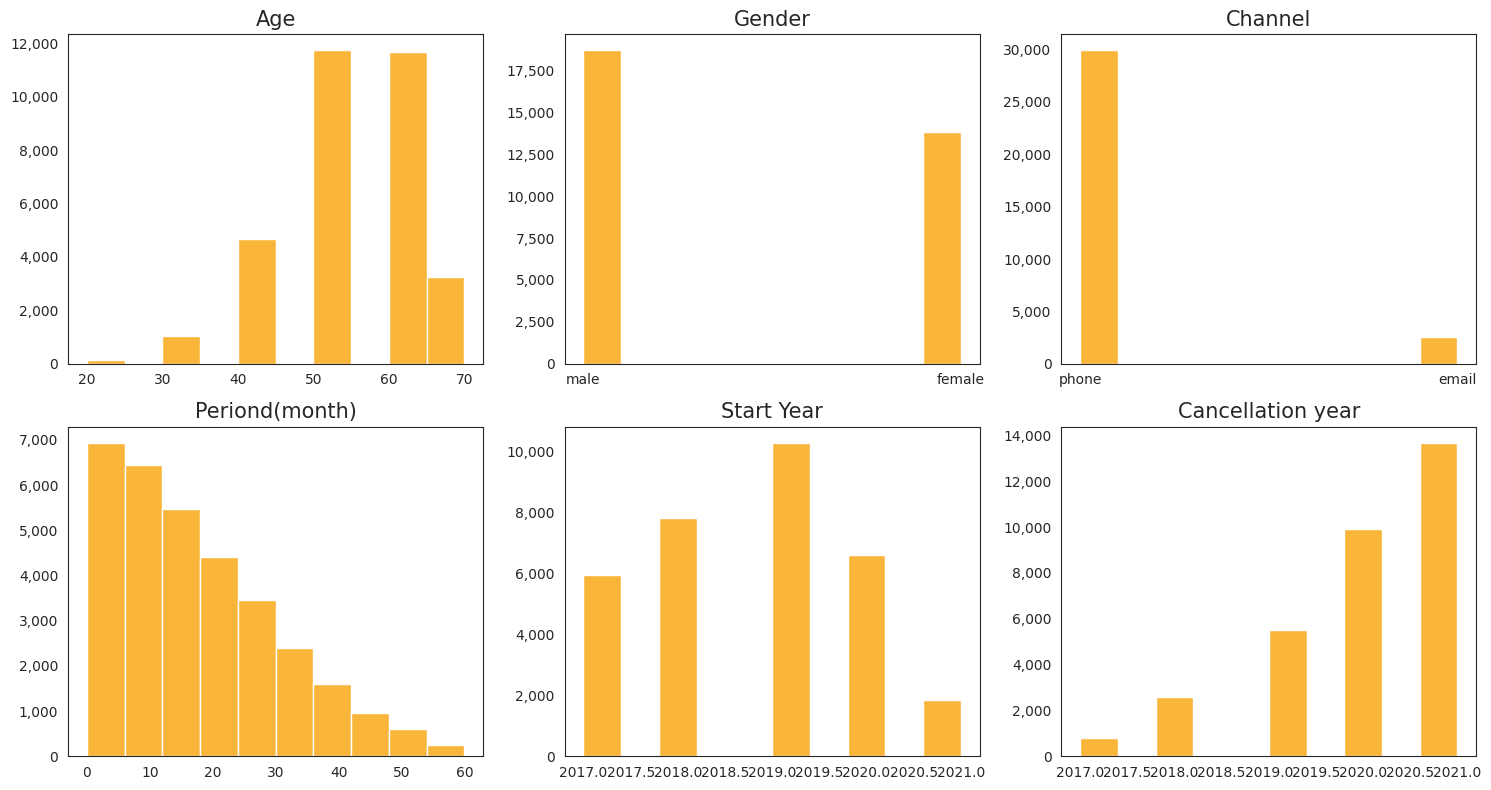

In [39]:
# plt.rcParams['font.family'] = 'NanumBarunGothic'
cols = ['age_gr','gender','channel','period_m', 's_year', 'c_year']
title = ['Age', 'Gender', 'Channel', 'Periond(month)', 'Start Year', 'Cancellation year']

plt.figure(figsize=(15,8))


for i in range(0,6):
    plt.subplot(2,3,i+1)
    plt.title(title[i], fontsize=15)
    plt.hist(x=ccl_ann.loc[:,cols[i]], color='#F9B539')
    # y축 천단위 , 표시
    current_values = plt.gca().get_yticks()
    plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values]);

plt.tight_layout()

In [40]:
ccl_ann.columns

Index(['id', 'age', 'age_gr', 'gender', 'channel', 'num_case',
       'signup_date_time', 'cancel_date_time', 'max_date', 's_date', 'c_date',
       'period_m', 's_year', 'c_year'],
      dtype='object')

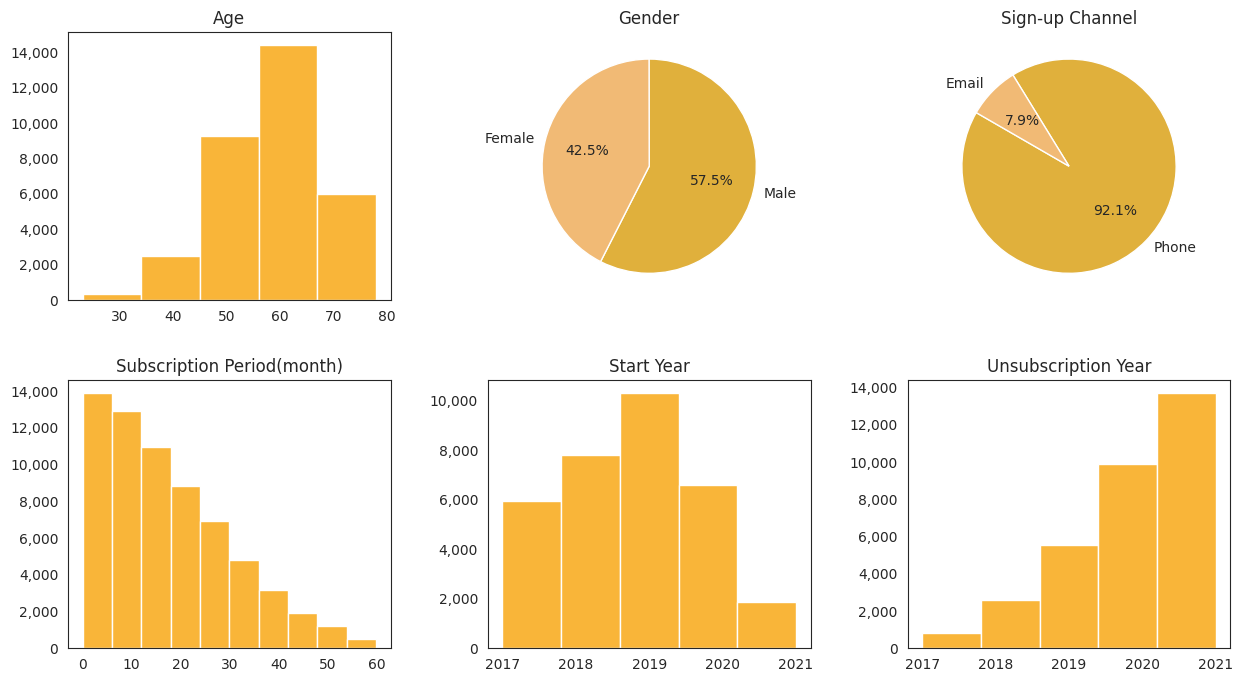

In [86]:
# 깨진 그래프 수정
gender_ratio = ccl_ann['gender'].value_counts()
channel_ratio = ccl_ann['channel'].value_counts()

f, axes = plt.subplots(2,3)
f.set_size_inches((15, 8)) # 그래프 크기 설정
plt.subplots_adjust(wspace = 0.3, hspace = 0.3) # 그래프 간 간격 설정

axes[0,0].hist(x=ccl_ann['age'], bins=5, color='#F9B539')
axes[0,0].set_yticklabels(['{:,.0f}'.format(x) for x in axes[0,0].get_yticks()]); # y축 천단위 , 표시
axes[0,0].set_title('Age')

axes[0,1].pie(x=gender_ratio, labels=['Male','Female'], autopct='%.1f%%', startangle=243)
axes[0,1].set_title('Gender')

axes[0,2].pie(x=channel_ratio, labels=['Phone','Email'], autopct='%.1f%%', startangle=150)
axes[0,2].set_title('Sign-up Channel')

axes[1,0].hist(x=ccl_ann['period_m'], color='#F9B539')
axes[1,0].set_yticklabels(['{:,.0f}'.format(x) for x in axes[0,0].get_yticks()]); # y축 천단위 , 표시
axes[1,0].set_title('Subscription Period(month)')

axes[1,1].hist(x=ccl_ann['s_year'], bins=5, color='#F9B539')
axes[1,1].set_yticklabels(['{:,.0f}'.format(x) for x in axes[0,0].get_yticks()]); # y축 천단위 , 표시
axes[1,1].set_title('Start Year')

axes[1,2].hist(x=ccl_ann['c_year'], bins=5, color='#F9B539')
axes[1,2].set_yticklabels(['{:,.0f}'.format(x) for x in axes[0,0].get_yticks()]); # y축 천단위 , 표시
axes[1,2].set_title('Unsubscription Year')

plt.show();

클러스터링

In [42]:
ccl_ann.head()

,id,age,age_gr,gender,channel,num_case,signup_date_time,cancel_date_time,max_date,s_date,c_date,period_m,s_year,c_year
1,2449,61,60,male,phone,1,2017-01-01 11:39:29,2021-09-05 10:00:02,2021-09-05 10:00:02,2017-01-01,2021-09-05,56.2,2017,2021
2,2450,58,50,female,phone,1,2017-01-01 11:42:00,2019-01-13 16:24:55,2019-01-13 16:24:55,2017-01-01,2019-01-13,24.4,2017,2019
4,2452,71,70,male,phone,1,2017-01-01 13:57:30,2021-06-28 18:06:01,2021-06-28 18:06:01,2017-01-01,2021-06-28,53.9,2017,2021
6,2454,53,50,male,phone,2,2017-01-01 15:35:03,2021-06-01 17:09:40,2021-06-01 17:09:40,2017-01-01,2021-06-01,53.0,2017,2021
8,2456,70,70,female,phone,1,2017-01-02 09:21:04,2017-06-08 15:57:45,2017-06-08 15:57:45,2017-01-02,2017-06-08,5.2,2017,2017


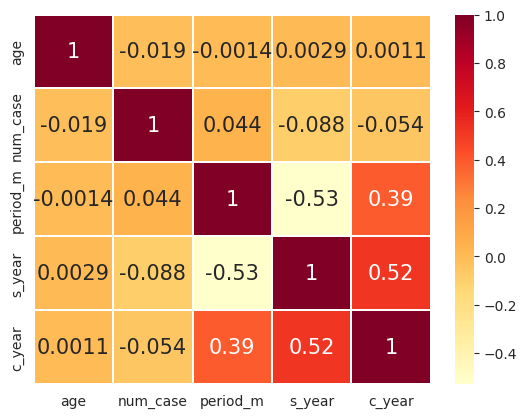

In [43]:
sns.heatmap(ccl_ann.corr(), annot=True, annot_kws={'size':15}, cmap='YlOrRd', linewidth=0.3)
plt.show()

수치형만 상관관계 분석 → 무의미

In [44]:
# 구독기간에 따라 3개 유형으로 구분
short_ann = ccl_ann.query('period_m<12') # 1년 이내에 구독 해지
#middle = ccl_ann.query('(period_m>=12) and (period_m<24)')
long_ann = ccl_ann.query('period_m>=12') # 재구독

lst_count = [short_ann.shape[0], long_ann.shape[0]] # middle.shape[0],
lst_count

[13390, 19132]

In [45]:
long_ann.describe()

,age,num_case,period_m,s_year,c_year
count,19132.000000,19132.000000,19132.000000,19132.000000,19132.000000
mean,57.863318,1.246393,25.778120,2018.341888,2020.306032
std,9.362664,0.484914,10.625456,0.981633,0.858232
min,23.000000,1.000000,12.000000,2017.000000,2018.000000
25%,52.000000,1.000000,17.100000,2018.000000,2020.000000
50%,59.000000,1.000000,23.500000,2018.000000,2021.000000
75%,65.000000,1.000000,32.200000,2019.000000,2021.000000
max,78.000000,5.000000,59.900000,2020.000000,2021.000000


재정 자문 관련 콘텐츠 제공하므로 실용재에 가까움
연간 구독한 후 1년 이내에 구독취소를 했다면 정보에 만족도가 떨어졌거나 유익하지 않다고 느꼈을 가능성이 큼. 해지 막기 위해 노력해도 효과 없을 듯

연령대와 채널은 이용자 유형 간 큰 차이 없음. 전체 데이터의 채널 구성비와 유사

In [46]:
# 구독기간 1년 단위로
new = ccl_ann.query('period_m<12') # 1년 이내에 구독 해지
re1 = ccl_ann.query('(period_m>=12) and (period_m<24)')
re2 = ccl_ann.query('(period_m>=24) and (period_m<36)')
re3 = ccl_ann.query('(period_m>=36) and (period_m<48)')
re4 = ccl_ann.query('(period_m>=48) and (period_m<60)')

re_sub = pd.DataFrame({'category':['new','re1','re2','re3','re4'],
    'count':[new.shape[0], re1.shape[0], re2.shape[0], re3.shape[0], re4.shape[0]],
    'avg_period':[new['period_m'].mean().round(2),
                re1['period_m'].mean().round(2),
                re2['period_m'].mean().round(2),
                re3['period_m'].mean().round(2),
                re4['period_m'].mean().round(2)]})
re_sub['unsubscribe_after_renewal'] = (re_sub['avg_period']%12).round(2)
re_sub

,category,count,avg_period,unsubscribe_after_renewal
0,new,13390,5.78,5.78
1,re1,9882,17.50,5.50
2,re2,5845,29.23,5.23
3,re3,2550,41.05,5.05
4,re4,855,52.34,4.34


In [47]:
print(re_sub['unsubscribe_after_renewal'].mean().round(2))

5.18


* * *

## 모델링 위한 전처리

#### 기존안
- 연간 구독자만 훈련데이터에 넣고, 타겟은 기간 기준으로만 설정

In [59]:
dfm = df[df['product']=='annual']
print(dfm.shape)
dfm.head()

(139347, 16)


,id,age,age_gr,gender,product,channel,num_case,signup_date_time,cancel_date_time,cancel,max_date,s_date,c_date,period_m,s_year,c_year
0,2448,76,70,female,annual,phone,1,2017-01-01 10:35:09,0,0,2021-12-31,2017-01-01,2021-12-31,60.0,2017,2021
1,2449,61,60,male,annual,phone,1,2017-01-01 11:39:29,2021-09-05 10:00:02,1,2021-09-05 10:00:02,2017-01-01,2021-09-05,56.2,2017,2021
2,2450,58,50,female,annual,phone,1,2017-01-01 11:42:00,2019-01-13 16:24:55,1,2019-01-13 16:24:55,2017-01-01,2019-01-13,24.4,2017,2019
4,2452,71,70,male,annual,phone,1,2017-01-01 13:57:30,2021-06-28 18:06:01,1,2021-06-28 18:06:01,2017-01-01,2021-06-28,53.9,2017,2021
5,2453,56,50,male,annual,phone,2,2017-01-01 15:26:14,0,0,2021-12-31,2017-01-01,2021-12-31,60.0,2017,2021


In [61]:
# 불필요한 특성 제거
dfm=dfm[['age','gender','product','channel','num_case','period_m','cancel']]

# 컬럼명 정리
dfm.columns = ['age','gender','product','channel','cases','period','churn']

# (재)구독 후 이용기간 특성 추가
n_period = []
for i in dfm['period']:
    n_period.append(i%12)

dfm['after renewal'] = n_period

# 구독횟수 특성 추가
count = []
for i in dfm['period']:
    if (i//12) == 0:
        count.append(int(i//12))
    else:
        count.append(int(i//12+1))
dfm['re_count'] = count

dfm.head()

,age,gender,product,channel,cases,period,churn,after renewal,re_count
0,76,female,annual,phone,1,60.0,0,0.0,6
1,61,male,annual,phone,1,56.2,1,8.2,5
2,58,female,annual,phone,1,24.4,1,0.4,3
4,71,male,annual,phone,1,53.9,1,5.9,5
5,56,male,annual,phone,2,60.0,0,0.0,6


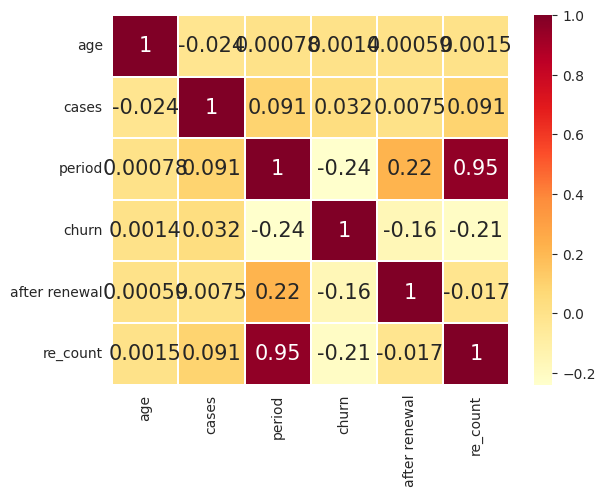

In [62]:
# 특성 간 상관관계 확인
# 트리모델은 상관관계 높은 변수 알아서 처리 -> 모든 변수 그대로 투입
sns.heatmap(dfm.corr(), annot=True, annot_kws={'size':15}, cmap='YlOrRd', linewidth=0.3)
plt.show()

In [ ]:
# 데이터분석결과를 특성으로 추가
# annual, period after renewal이 3.18~4.18인 사람 1
# likely = []
# for i, j in zip(dfm['product'], dfm['period after renewal']):
#     if (i == 'annual') and (j>=3.18) and (j<=4.18):
#         likely.append(1)
#     else:
#         likely.append(0)

# dfm['likely'] = likely

# dfm.head()

,age,gender,product,channel,cases,period,churn,period after renewal,likely
0,76,female,annual,phone,1,60.0,0,0.0,0
1,61,male,annual,phone,1,56.2,1,8.2,0
2,58,female,annual,phone,1,24.4,1,0.4,0
4,71,male,annual,phone,1,53.9,1,5.9,0
5,56,male,annual,phone,2,60.0,0,0.0,0


In [64]:
# 훈련/검증/테스트 데이터 구분
from sklearn.model_selection import train_test_split

train, test = train_test_split(
    dfm, train_size=0.80, test_size=0.20, stratify=dfm['churn'], random_state=42)

train, val = train_test_split(
    train, train_size=0.80, test_size=0.20, random_state=42)

train.shape, val.shape, test.shape

((89181, 9), (22296, 9), (27870, 9))

In [65]:
target = 'churn'
features = dfm.drop(columns=[target]).columns

def divide_data(df):
    target = 'churn'
    features = dfm.drop(columns=[target]).columns
    X = df[features]
    y = df[target]
    return X, y

X_train, y_train = divide_data(train)
X_val, y_val = divide_data(val)
X_test, y_test = divide_data(test)
print(X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape)

(89181, 8) (89181,) (22296, 8) (22296,) (27870, 8) (27870,)


In [66]:
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 1.9 MB/s eta 0:00:00


In [67]:
from category_encoders import OneHotEncoder
# from sklearn.preprocessing import OneHotEncoder
from category_encoders import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay # 오차행렬 히트맵
from sklearn.metrics import confusion_matrix # 오차행렬 생성
from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, f1_score
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats.distributions import uniform

In [68]:
# 기준모델 - 최빈값
# 기준모델 - 최빈값
y_base = [y_train.mode()]*len(y_train)

# 기준모델 정확도
print("training accuracy: ", accuracy_score(y_train, y_base).round(2))
print("training recall: ", recall_score(y_train, y_base).round(2))

training accuracy:  0.77
training recall:  0.0


타겟 비율이 매우 불균형하기 때문에 정확도만 보고 성능 평가하기 어려움. 다른 지표도 함께보되 reall 잘 살펴보자. 해지고객 아니라고 판단했는데 맞을 경우가 치명적임

In [69]:
dfm['churn'].value_counts(normalize=True)

0    0.766611
1    0.233389
Name: churn, dtype: float64

2. random forest

random forest 훈련 정확도:  0.6347876789899194
random forest 검증 정확도:  0.6323107283817725
              precision    recall  f1-score   support

           0       0.85      0.63      0.72     16948
           1       0.35      0.64      0.45      5348

    accuracy                           0.63     22296
   macro avg       0.60      0.63      0.59     22296
weighted avg       0.73      0.63      0.66     22296



Text(0.5, 1.0, 'Confusion matrix of Random forest, n = 22296')

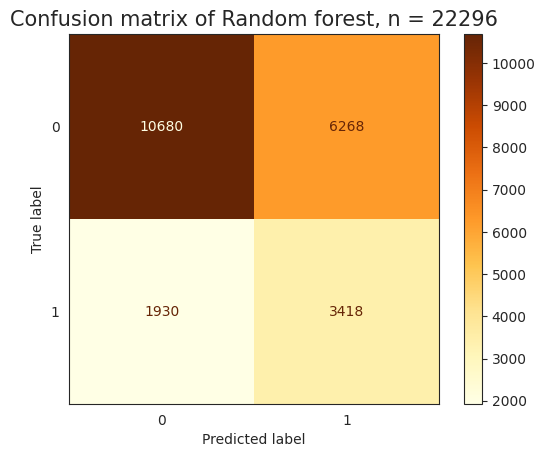

In [103]:
pipe_rf = make_pipeline(
    OrdinalEncoder(),
    RandomForestClassifier(
        random_state=42,
        oob_score=True,
        n_jobs=-1,
        class_weight='balanced',
        max_depth=5
        )
    )
pipe_rf.fit(X_train, y_train)
y_val_pred_rf = pipe_rf.predict(X_val)
print("random forest 훈련 정확도: ", pipe_rf.score(X_train, y_train))
print("random forest 검증 정확도: ", pipe_rf.score(X_val, y_val))
print(classification_report(y_val, y_val_pred_rf))

pcm = ConfusionMatrixDisplay.from_estimator(pipe_rf, X_val, y_val, cmap=plt.cm.YlOrBr)
plt.title(f'Confusion matrix of Random forest, n = {len(y_val)}', fontsize=15)

- support : 실제값의 class별 분포 수
- 0, 1은 class 의미(이진분류니까 2개)
- accuracy : 전체값 중 맞은 비율
- micro avg : (class 0 + class 1) / 2 - 산술평균
- weighted avg : 가중평균

3. XBGoost

xgboost 훈련 정확도 0.6490395936354156
xgboost 검증 정확도 0.651686401148188
              precision    recall  f1-score   support

           0       0.84      0.67      0.75     16948
           1       0.36      0.59      0.45      5348

    accuracy                           0.65     22296
   macro avg       0.60      0.63      0.60     22296
weighted avg       0.72      0.65      0.67     22296



Text(0.5, 1.0, 'Confusion matrix of XGBoost, n = 22296')

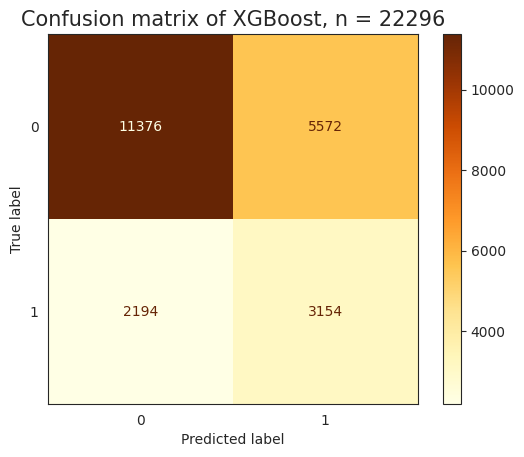

In [96]:
pipe_xgb = make_pipeline(
        OrdinalEncoder(),
        XGBClassifier(
                booster='gbtree', # dart보다 성능 좋았음
                objective='binary:logistic',
                eval_metric="error",  # error = 1 - accuracy 지표를 사용해 평가합니다.
                random_state=42,
                n_jobs=-1,
                max_depth=2,
                learning_rate=0.05,
                scale_pos_weight = (y_val == 0).sum() / (y_val == 1).sum(),
                colsample_bytree=0.2, # 컬럼 중 일부 샘플링해서 학습, 작을수록 과적합 감소
                subsample=0.2, # 데이터 중 일부 샘플링해서 학습, 낮을수록 과적합 감소
                min_child_weight=32,# 관측치에 대한 가중치 합의 최소
                reg_lambda=3, # 클수록 과적합 감소
                gamma=2
                )
        )

# early stopping 설정
# watchlist = [(X_train, y_train), (X_val, y_val)]
# pipe_xgb.fit(X_train, y_train, eval_set=watchlist, early_stopping_rounds=50)

pipe_xgb.fit(X_train, y_train)
y_val_pred_xgb = pipe_xgb.predict(X_val)

print("xgboost 훈련 정확도", pipe_xgb.score(X_train, y_train))
print("xgboost 검증 정확도", pipe_xgb.score(X_val, y_val))
print(classification_report(y_val, y_val_pred_xgb))

pcm = ConfusionMatrixDisplay.from_estimator(pipe_xgb, X_val, y_val, cmap=plt.cm.YlOrBr)
plt.title(f'Confusion matrix of XGBoost, n = {len(y_val)}', fontsize=15)

과적합이 적은 random forest 모델 선정

* * *
## 성능개선

### Oversampling

              precision    recall  f1-score   support

           0       0.84      0.63      0.72     16948
           1       0.35      0.63      0.45      5348

    accuracy                           0.63     22296
   macro avg       0.60      0.63      0.59     22296
weighted avg       0.72      0.63      0.66     22296



Text(0.5, 1.0, 'Confusion matrix of Random forest, n = 22296')

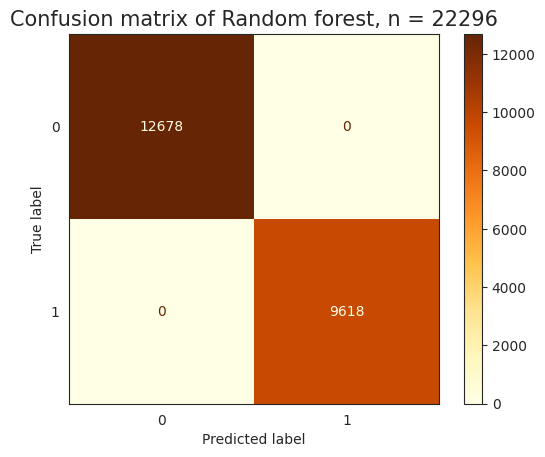

In [113]:
from imblearn.over_sampling import SMOTE

encoder = OrdinalEncoder()
X_train_encoded = encoder.fit_transform(X_train)
X_val_encoded = encoder.transform(X_val)

# 오버샘플링
X_train_sampled, y_train_sampled = SMOTE(random_state=42).fit_resample(X_train_encoded, y_train)

rf_over = RandomForestClassifier(
    random_state=42,
    oob_score=True,
    n_jobs=-1,
    max_depth=8
    )

rf_over.fit(X_train_sampled, y_train_sampled)
y_val_pred_rf_over = rf_over.predict(X_val_encoded)
# print("random forest 훈련 정확도: ", rf_over.score(X_train, y_train))
# print("random forest 검증 정확도: ", rf_over.score(X_val, y_val))
print(classification_report(y_val, y_val_pred_rf_over))

pcm = ConfusionMatrixDisplay.from_estimator(rf_over, X_val_encoded, y_val_pred_rf_over, cmap=plt.cm.YlOrBr)
plt.title(f'Confusion matrix of Random forest, n = {len(y_val_pred_rf_over)}', fontsize=15)

데이터 불균형 때문에 오버샘플링 시도해봤으니 성능 변화 없음

In [105]:
# 1-class의 데이터가 0-class의 데이터 수만큼 늘어남
y_train_sampled.value_counts()

0    68512
1    68512
Name: churn, dtype: int64

## 문제 재정의, 타겟 조정

- 문제 재정의 : 이탈 고객 예측 -> 재구독 후 3.18~4.18 개월 고객 예측
- 타겟 직접 설정

In [145]:
# churn(target)을 재설정
dfn = dfm.copy()

lst = []
for i in dfn.period:
    if (i%12 >=3.18) and (i%12 <=4.18): # %: 나머지
        lst.append(1)
    else:
        lst.append(0)
dfn['churn'] = lst
dfn.head()

,age,gender,product,channel,cases,period,churn,after renewal,re_count
0,76,female,annual,phone,1,60.0,0,0.0,6
1,61,male,annual,phone,1,56.2,0,8.2,5
2,58,female,annual,phone,1,24.4,0,0.4,3
4,71,male,annual,phone,1,53.9,0,5.9,5
5,56,male,annual,phone,2,60.0,0,0.0,6


In [146]:
dfn.drop(['re_count', 'after renewal'], axis=1, inplace=True)
dfn.head()

,age,gender,product,channel,cases,period,churn
0,76,female,annual,phone,1,60.0,0
1,61,male,annual,phone,1,56.2,0
2,58,female,annual,phone,1,24.4,0
4,71,male,annual,phone,1,53.9,0
5,56,male,annual,phone,2,60.0,0


In [147]:
dfn['churn'].value_counts()

0    128884
1     10463
Name: churn, dtype: int64

In [148]:
# 훈련/검증/테스트 데이터 구분
from sklearn.model_selection import train_test_split

train, test = train_test_split(
    dfn, train_size=0.80, test_size=0.20, stratify=dfn['churn'], random_state=42)

train, val = train_test_split(
    train, train_size=0.80, test_size=0.20, random_state=42)

train.shape, val.shape, test.shape

((89181, 7), (22296, 7), (27870, 7))

In [149]:
target = 'churn'
features = dfn.drop(columns=[target]).columns

def divide_data(df):
    target = 'churn'
    features = dfn.drop(columns=[target]).columns
    X = df[features]
    y = df[target]
    return X, y

X_train, y_train = divide_data(train)
X_val, y_val = divide_data(val)
X_test, y_test = divide_data(test)
print(X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape)

(89181, 6) (89181,) (22296, 6) (22296,) (27870, 6) (27870,)


random forest 훈련 정확도:  0.9699151164485709
random forest 검증 정확도:  0.9721026193039111
              precision    recall  f1-score   support

           0       0.97      1.00      0.99     20652
           1       1.00      0.62      0.77      1644

    accuracy                           0.97     22296
   macro avg       0.98      0.81      0.88     22296
weighted avg       0.97      0.97      0.97     22296



Text(0.5, 1.0, 'Confusion matrix of Random forest, n = 22296')

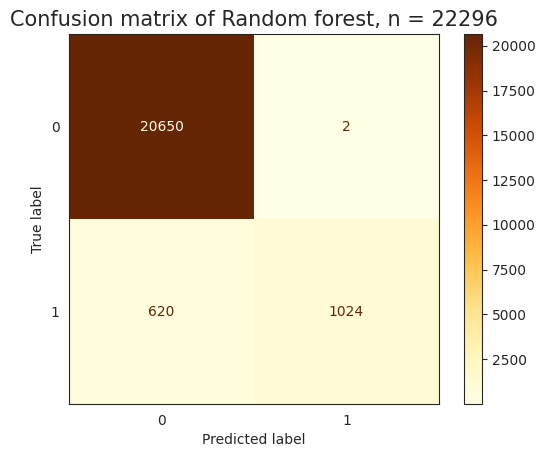

In [151]:
pipe_rf = make_pipeline(
    OrdinalEncoder(),
    RandomForestClassifier(
        random_state=42,
        oob_score=True,
        n_jobs=-1,
        class_weight='balanced',
        max_depth=5
        )
    )
pipe_rf.fit(X_train, y_train)
y_val_pred_rf = pipe_rf.predict(X_val)
print("random forest 훈련 정확도: ", pipe_rf.score(X_train, y_train))
print("random forest 검증 정확도: ", pipe_rf.score(X_val, y_val))
print(classification_report(y_val, y_val_pred_rf))

pcm = ConfusionMatrixDisplay.from_estimator(pipe_rf, X_val, y_val, cmap=plt.cm.YlOrBr)
plt.title(f'Confusion matrix of Random forest, n = {len(y_val)}', fontsize=15)

### hyperparameter tuning

In [72]:
# 기존 모델
pipe_rf = make_pipeline(
    OrdinalEncoder(),
    RandomForestClassifier(
        random_state=42,
        oob_score=True,
        n_jobs=-1,
        class_weight='balanced',
        )
    )

In [152]:
# randomized search CV
pipe_rf = make_pipeline(
    OrdinalEncoder(),
    RandomForestClassifier(
        random_state=42,
        oob_score=True,
        n_jobs=2,
        class_weight='balanced',
        )
    )

params = {
    'randomforestclassifier__criterion' : ['gini', 'entropy'],
    'randomforestclassifier__max_depth': [5,6,7,8,9],
    'randomforestclassifier__min_samples_split' : [14,16,18],
    'randomforestclassifier__min_samples_leaf' : [2,3,4]

}

clf = RandomizedSearchCV(
        pipe_rf,
        param_distributions=params,
        scoring='recall',
        n_iter=50, cv=5, verbose=0, random_state=42
    )


clf.fit(X_train, y_train)
print("최적 파라미터:", clf.best_params_)
print("recall:", clf.best_score_)

최적 파라미터: {'randomforestclassifier__min_samples_split': 14, 'randomforestclassifier__min_samples_leaf': 3, 'randomforestclassifier__max_depth': 9, 'randomforestclassifier__criterion': 'gini'}
recall: 0.8383866281478373


In [153]:
best_rf = clf.best_estimator_
best_rf.fit(X_train, y_train)
y_pred_val = best_rf.predict(X_val)
y_pred_test = best_rf.predict(X_test)
print("random forest 훈련 정확도: ", best_rf.score(X_train, y_train))
print("random forest 검증 정확도: ", best_rf.score(X_val, y_val))
print(classification_report(y_val, y_pred_val))
print(classification_report(y_test, y_pred_test))

random forest 훈련 정확도:  0.9873067133133739
random forest 검증 정확도:  0.9869483315392895
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     20652
           1       0.99      0.83      0.90      1644

    accuracy                           0.99     22296
   macro avg       0.99      0.91      0.95     22296
weighted avg       0.99      0.99      0.99     22296

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     25777
           1       1.00      0.81      0.90      2093

    accuracy                           0.99     27870
   macro avg       0.99      0.91      0.94     27870
weighted avg       0.99      0.99      0.99     27870



In [ ]:
y_test

33882     0
20143     1
140968    0
146400    0
74134     0
         ..
80864     0
151617    0
1918      0
166400    0
80217     0
Name: churn, Length: 27870, dtype: int64

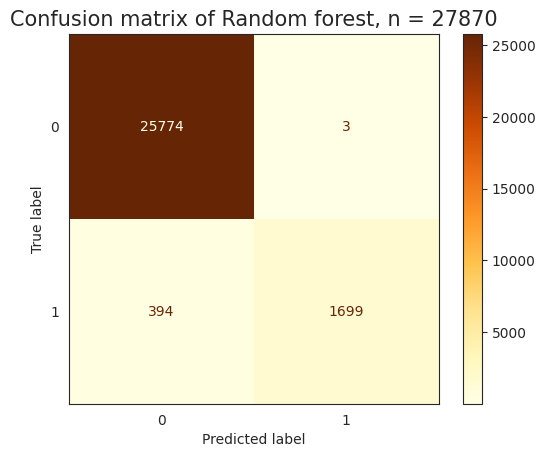

In [154]:
pcm = ConfusionMatrixDisplay.from_estimator(best_rf, X_test, y_test, cmap=plt.cm.YlOrBr)
plt.title(f'Confusion matrix of Random forest, n = {len(y_test)}', fontsize=15)
plt.show()

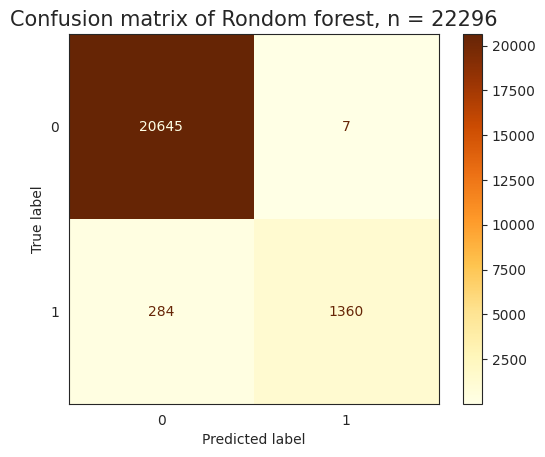

In [155]:
pcm = ConfusionMatrixDisplay.from_estimator(best_rf, X_val, y_val,
                            cmap=plt.cm.YlOrBr)
plt.title(f'Confusion matrix of Rondom forest, n = {len(y_val)}', fontsize=15)
plt.show()

모델 해석 - 순열중요도

In [77]:
!pip install eli5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107717 sha256=b54438a6b7f0bf094ab82529e00a88e2c69b3ce87e0ea1d0b400f083ea44689a
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5


Text(0.5, 1.0, 'Permution Importance')

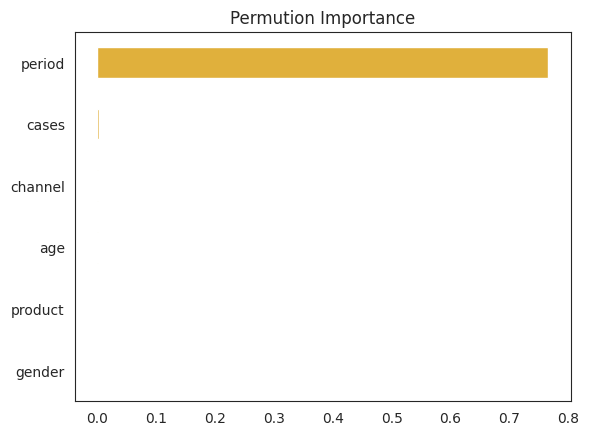

In [156]:
from eli5.sklearn import PermutationImportance
permuter = PermutationImportance(
    best_rf.named_steps['randomforestclassifier'],
    scoring='recall',
    n_iter=5,
    random_state=42,
)

X_val_preprocessed = best_rf[0].transform(X_val) # rf[0] : OrdinalEncoder
permuter.fit(X_val_preprocessed, y_val) # score 재계산

feature_names = X_test.columns.tolist()
pi = pd.Series(permuter.feature_importances_, feature_names).sort_values(ascending=True)
pi.tail(10).plot.barh() # 상위 10개
plt.title('Permution Importance')

In [157]:
# 특성별 score 확인
import eli5
eli5.show_weights(
    permuter,
    top=None, # top n 지정 가능, None일 경우 모든 특성
    feature_names=feature_names # list 형식으로 넣어야 함
)

Weight,Feature
0.7655 ± 0.0072,period
0.0022 ± 0.0024,cases
0.0016 ± 0.0026,channel
0.0011 ± 0.0009,age
0 ± 0.0000,product
-0.0002 ± 0.0028,gender


pdp plot

In [ ]:
!pip install pdpbox

In [ ]:
X_test.head()

In [ ]:
y_test.head()

In [ ]:
X_test.head()

In [ ]:
test = X_test.copy()
test['target'] = y_test
test.head()

In [ ]:
# from pdpbox.pdp import PDPIsolate, PDPInteract
# plt.rcParams['figure.dpi'] = 144 # 이미지 화질 조정

# target_feature = 'period'

# isolated = PDPIsolate(
#     model=best_rf,
#     df=test,
#     n_classes=2,
#     model_features=['age','gender','channel','cases','period'],
#     feature_name='period',
#     feature='target',
#     # target=y_test,
#     grid_type='percentile', # default = 'percentile', or 'equal'
#     num_grid_points=10 # default = 10
# )

# isolated.plot()

In [ ]:
# from sklearn.inspection import PartialDependenceDisplay
# features = X_test.columns
# PartialDependenceDisplay.from_estimator(best_rf, X_test, features, kind='individual')

In [ ]:
# from pdpbox.pdp import pdp_interact, pdp_interact_plot

# features = ['period']

# interaction = pdp_interact(
#     model=best_rf,
#     dataset=X_test,
#     model_features=X_test.columns,
#     features=features
# )

# pdp_interact_plot(interaction, plot_type='grid',
#                   feature_names=features);

## (번외) 연간구독자 대상, churn 유무를 타겟으로 예측

In [ ]:
df.head()

In [ ]:
sns.heatmap(df.corr(), annot=True, annot_kws={'size':15}, cmap='YlOrRd', linewidth=0.3)
plt.show()

In [ ]:
df_annual = df[df['product']=='annual']
print(df_annual.shape)
df_annual.head()

In [ ]:
# 불필요한 특성 제거
df_model=df.drop(['id','s_date','c_date','s_year','c_year'], axis=1)
df_model.head()

In [ ]:
# 훈련/검증/테스트 데이터 구분
from sklearn.model_selection import train_test_split

train, test = train_test_split(
    df_model, train_size=0.80, test_size=0.20, stratify=df_model['cancel'], random_state=42)

train, val = train_test_split(
    train, train_size=0.80, test_size=0.20, random_state=42)

train.shape, val.shape, test.shape

In [ ]:
def divide_data(df):
    target = 'cancel'
    features = df_model.drop(columns=[target]).columns
    X = df[features]
    y = df[target]
    return X, y

X_train, y_train = divide_data(train)
X_val, y_val = divide_data(val)
X_test, y_test = divide_data(test)
print(X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape)

In [ ]:
# 기준모델 - 최빈값
y_base = [y_train.mode()]*len(y_train)

# 기준모델 정확도
print("training accuracy: ", accuracy_score(y_train, y_base).round(2))

In [ ]:
df_model['cancel'].value_counts(normalize=True)

In [ ]:
X_train.head()

In [ ]:
pipe_rf = make_pipeline(
    OrdinalEncoder(),
    RandomForestClassifier(
        random_state=42,
        oob_score=True,
        n_jobs=-1,
        class_weight='balanced',
        max_depth=5
        )
    )
pipe_rf.fit(X_train, y_train)
y_val_pred_rf = pipe_rf.predict(X_val)
print("random forest 훈련 정확도: ", pipe_rf.score(X_train, y_train))
print("random forest 검증 정확도: ", pipe_rf.score(X_val, y_val))
print(classification_report(y_val, y_val_pred_rf))

pcm = ConfusionMatrixDisplay.from_estimator(pipe_rf, X_val, y_val, cmap=plt.cm.YlOrBr)
plt.title(f'Confusion matrix of Random forest, n = {len(y_val)}', fontsize=15)

In [ ]:
from eli5.sklearn import PermutationImportance
permuter = PermutationImportance(
    pipe_rf.named_steps['randomforestclassifier'],
    scoring='roc_auc',
    n_iter=5,
    random_state=42,
)

X_val_preprocessed = pipe_rf[0].transform(X_val) # rf[0] : OrdinalEncoder
permuter.fit(X_val_preprocessed, y_val) # score 재계산

feature_names = X_test.columns.tolist()
pi = pd.Series(permuter.feature_importances_, feature_names).sort_values(ascending=True)
pi.tail(10).plot.barh() # 상위 10개
plt.title('Permution Importance')

In [ ]:
pipe_xgb = make_pipeline(
        OrdinalEncoder(),
        XGBClassifier(
                booster='gbtree', # dart보다 성능 좋았음
                objective='binary:logistic',
                eval_metric="error",  # error = 1 - accuracy 지표를 사용해 평가합니다.
                random_state=42,
                n_jobs=-1,
                max_depth=2,
                learning_rate=0.05,
                scale_pos_weight = (y_val == 0).sum() / (y_val == 1).sum(),
                colsample_bytree=0.2, # 컬럼 중 일부 샘플링해서 학습, 작을수록 과적합 감소
                subsample=0.2, # 데이터 중 일부 샘플링해서 학습, 낮을수록 과적합 감소
                min_child_weight=32,# 관측치에 대한 가중치 합의 최소
                reg_lambda=3, # 클수록 과적합 감소
                gamma=2
                )
        )

# early stopping 설정
# watchlistfit(X_train, y_ = [(X_train, y_train), (X_val, y_val)]
# pipe_xgb.train, eval_set=watchlist, early_stopping_rounds=50)

pipe_xgb.fit(X_train, y_train)
y_val_pred_xgb = pipe_xgb.predict(X_val)

print("xgboost 훈련 정확도", pipe_xgb.score(X_train, y_train))
print("xgboost 검증 정확도", pipe_xgb.score(X_val, y_val))
print(classification_report(y_val, y_val_pred_xgb))

pcm = ConfusionMatrixDisplay.from_estimator(pipe_xgb, X_val, y_val, cmap=plt.cm.YlOrBr)
plt.title(f'Confusion matrix of XGBoost, n = {len(y_val)}', fontsize=15)